In [105]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
folder = "company_repos"
file_paths = {
    "Appsilon": "github_repos_Appsilon.csv",
    "Ardigen": "github_repos_ardigen.csv",
    "AstraZeneca": "github_repos_astrazeneca.csv",
    "Cambrium-Bio": "github_repos_Cambrium-bio.csv",
    "DNAnexus": "github_repos_dnanexus.csv",
    "genxnetwork": "github_repos_genxnetwork.csv",
    "HelicalAI": "github_repos_helicalai.csv",
    "KnowingHealth": "github_repos_knowinghealth.csv",
    "IntelliSeq": "github_repos_intelliseq.csv",
    "Milaboratories": "github_repos_mila.csv",
    # "Omniscope": "github_repos_omniscope.csv",
    # "ontoforce": "github_repos_ontoforce.csv",
    "PacificBiosciences": "github_repos_PacificBiosciences.csv",
    "Saphetor": "github_repos_saphetor.csv",
    "SeqeraLabs": "github_repos_seqeralabs.csv",
    "Seqone": "github_repos_seqone.csv", 
    "TheHyve": "github_repos_thehyve.csv"
}

dfs = []
for company, path in file_paths.items():
    df = pd.read_csv(os.path.join(folder, path))
    df["Company"] = company # Add company identifier
    dfs.append(df)

all_repos_df = pd.concat(dfs, ignore_index=True)

if 'Created_At' in all_repos_df.columns:
    all_repos_df['Created_At'] = pd.to_datetime(all_repos_df['Created_At'])

if 'Updated_At' in all_repos_df.columns:
    all_repos_df['Updated_At'] = pd.to_datetime(all_repos_df['Updated_At'])

all_repos_df["Company"] = all_repos_df["Company"].str.lower()
all_repos_df["Organization"] = all_repos_df["Organization"].str.lower()

if 'Organization' in all_repos_df.columns:
    repos_df = all_repos_df[all_repos_df["Company"] == all_repos_df["Organization"]].reset_index(drop=True)

# repos_df["Has_Forks"] = repos_df["Forks"] > 0

In [107]:
company_abbrev_dict = {
    "appsilon": "APSL",
    "ardigen": "ARDGN",
    "astrazeneca": "AZ",
    "cambrium-bio": "CB",
    "dnanexus": "DN",
    "genxnetwork": "GXT",
    "helicalai": "HA",
    "knowinghealth": "KH",
    "intelliseq": "IS",
    "milaboratories": "ML",
    # "omniscope": "OS",
    # "ontoforce": "OF",
    "pacificbiosciences": "PB",
    "saphetor": "ST",
    "seqeralabs": "SL",
    "seqone": "SQ", 
    "thehyve": "TH"
}
repos_df['Company'] = repos_df['Company'].map(company_abbrev_dict)
repos_df

,Organization,Repository,Is_Fork,Parent_Repo,Parent_Archived,Stars,Forks,Forks_History,Open_Issues,Closed_Issues,Avg_Response_Time (sec),Has_README,Has_Wiki,Commit_Count,Release_Count,Contributors_Count,Contributors,Company
0,appsilon,styleguide,0.0,NaN,NaN,100.0,9.0,"[{'user': 'hassansw', 'forked_at': '2019-02-16...",2.0,4.0,49859.5,1.0,1.0,23.0,0.0,5.0,"[{'user': 'marekrogala', 'contributions': 10, ...",APSL
1,appsilon,formage,1.0,node4good/formage,False,0.0,0.0,[],1.0,1.0,NaN,1.0,1.0,1091.0,0.0,13.0,"[{'user': 'ishai', 'contributions': 79, 'locat...",APSL
2,appsilon,js-xlsx,1.0,SheetJS/sheetjs,False,1.0,0.0,[],1.0,2.0,NaN,1.0,1.0,167.0,0.0,10.0,"[{'user': 'SheetJSDev', 'contributions': 145, ...",APSL
3,appsilon,handsontable,1.0,handsontable/handsontable,False,0.0,0.0,[],1.0,1.0,NaN,1.0,1.0,3820.0,0.0,28.0,"[{'user': 'warpech', 'contributions': 2507, 'l...",APSL
4,appsilon,website-cdn,0.0,NaN,NaN,1.0,0.0,[],2.0,1.0,NaN,0.0,1.0,40.0,0.0,4.0,"[{'user': 'przytu1', 'contributions': 25, 'loc...",APSL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,thehyve,heim-folder-management-plugin,0.0,NaN,NaN,0.0,0.0,[],0.0,0.0,NaN,1.0,1.0,106.0,0.0,9.0,"[{'user': 'ricepeterm', 'contributions': 23, '...",TH
527,thehyve,heim-Rmodules,0.0,NaN,NaN,0.0,0.0,[],0.0,0.0,NaN,1.0,1.0,1441.0,0.0,26.0,"[{'user': 'rnugraha', 'contributions': 377, 'l...",TH
528,thehyve,heim-transmart-rest-api,0.0,NaN,NaN,0.0,0.0,[],0.0,0.0,NaN,1.0,1.0,270.0,0.0,10.0,"[{'user': 'cataphract', 'contributions': 95, '...",TH
529,thehyve,heim-transmart-core-db,0.0,NaN,NaN,0.0,0.0,[],0.0,0.0,NaN,1.0,1.0,856.0,0.0,15.0,"[{'user': 'cataphract', 'contributions': 437, ...",TH


##  Contributor Type Categorization (Startup, Mid-Level, Enterprise)

In [109]:
orgs_df = pd.read_csv('company_repos/orgs.csv')

repos_df = repos_df.merge(orgs_df[['Organization', 'Company Type', 'Location']], 
                          on='Organization', how='left')

unique_companies = repos_df.groupby('Company Type')['Company'].nunique().reset_index().rename(columns={'Company': 'Unique Companies'})

repo_count = repos_df['Company Type'].value_counts().reset_index().rename(columns={'count': 'Total Repositories'})

company_summary = unique_companies.merge(repo_count, on='Company Type')


In [133]:
repos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531 entries, 0 to 530
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Organization             531 non-null    object 
 1   Repository               529 non-null    object 
 2   Is_Fork                  529 non-null    object 
 3   Parent_Repo              120 non-null    object 
 4   Parent_Archived          120 non-null    object 
 5   Stars                    529 non-null    float64
 6   Forks                    529 non-null    float64
 7   Forks_History            529 non-null    object 
 8   Open_Issues              529 non-null    float64
 9   Closed_Issues            529 non-null    float64
 10  Avg_Response_Time (sec)  140 non-null    float64
 11  Has_README               529 non-null    object 
 12  Has_Wiki                 529 non-null    object 
 13  Commit_Count             529 non-null    float64
 14  Release_Count            5

In [110]:
company_summary.to_csv('Page 9 Company & Repository Distribution by Company Type.csv')

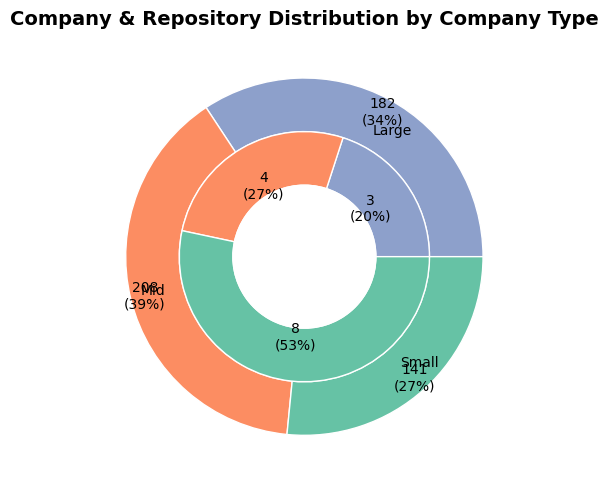

In [134]:
company_types = company_summary['Company Type']
unique_companies = company_summary['Unique Companies']
total_repos = company_summary['Total Repositories']

colors = ['#8da0cb', '#fc8d62', '#66c2a5']

fig, ax = plt.subplots(figsize=(7, 5))

# Outer pie - Total repositories
def repo_label(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return f"{absolute}\n({pct:.0f}%)"

ax.pie(total_repos, radius=1, labels=company_types, labeldistance=0.8,
       colors=colors, wedgeprops=dict(width=0.3, edgecolor='w'),
       autopct=lambda pct: repo_label(pct, total_repos), pctdistance=0.92)

# Inner pie - Unique companies
def company_label(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return f"{absolute}\n({pct:.0f}%)"

ax.pie(unique_companies, radius=0.7, colors=colors, wedgeprops=dict(width=0.3, edgecolor='w'), 
       autopct=lambda pct: company_label(pct, unique_companies), pctdistance=0.65)

# Center circle
centre_circle = plt.Circle((0, 0), 0.4, color='white', fc='white')
fig.gca().add_artist(centre_circle)

plt.title('Company & Repository Distribution by Company Type', fontsize=14, weight='bold')

plt.tight_layout()
plt.savefig('elixir_reporting2/dual_ring_doughnut_actual_numbers.png', dpi=300, bbox_inches='tight')
plt.show()

In [135]:
# fig, ax1 = plt.subplots(figsize=(9, 4))

# sns.barplot(data=company_summary, x='Company Type', y='Unique Companies', palette='pastel', ax=ax1)
# ax1.set_ylabel('Number of Unique Companies', fontsize=9)
# ax1.set_xlabel('Company Type', fontsize=9)
# ax1.set_title('Company Participation & Repository Contribution by Company Type', fontsize=11, weight='bold')

# ax2 = ax1.twinx()
# sns.barplot(data=company_summary, x='Company Type', y='Total Repositories', palette='muted', alpha=0.7, ax=ax2)
# ax2.set_ylabel('Number of Repositories', fontsize=9)

# for i in range(company_summary.shape[0]):
#     # ax1.text(i, company_summary['Unique Companies'][i] + 0.5, int(company_summary['Unique Companies'][i]), 
#     #          ha='center', fontsize=11, weight='bold')
#     ax2.text(i, company_summary['Total Repositories'][i] + 1, int(company_summary['Total Repositories'][i]), 
#              ha='center', fontsize=11, color='black')

# plt.tight_layout()
# plt.savefig('elixir_reporting2/company_type_contribution.png', dpi=300, bbox_inches='tight')

In [140]:
repos_df

,Organization,Repository,Is_Fork,Parent_Repo,Parent_Archived,Stars,Forks,Forks_History,Open_Issues,Closed_Issues,Avg_Response_Time (sec),Has_README,Has_Wiki,Commit_Count,Release_Count,Contributors_Count,Contributors,Company,Company Type,Location
0,appsilon,styleguide,0.0,NaN,NaN,100.0,9.0,"[{'user': 'hassansw', 'forked_at': '2019-02-16...",2.0,4.0,49859.5,1.0,1.0,23.0,0.0,5.0,"[{'user': 'marekrogala', 'contributions': 10, ...",APSL,Mid,Poland
1,appsilon,formage,1.0,node4good/formage,False,0.0,0.0,[],1.0,1.0,NaN,1.0,1.0,1091.0,0.0,13.0,"[{'user': 'ishai', 'contributions': 79, 'locat...",APSL,Mid,Poland
2,appsilon,js-xlsx,1.0,SheetJS/sheetjs,False,1.0,0.0,[],1.0,2.0,NaN,1.0,1.0,167.0,0.0,10.0,"[{'user': 'SheetJSDev', 'contributions': 145, ...",APSL,Mid,Poland
3,appsilon,handsontable,1.0,handsontable/handsontable,False,0.0,0.0,[],1.0,1.0,NaN,1.0,1.0,3820.0,0.0,28.0,"[{'user': 'warpech', 'contributions': 2507, 'l...",APSL,Mid,Poland
4,appsilon,website-cdn,0.0,NaN,NaN,1.0,0.0,[],2.0,1.0,NaN,0.0,1.0,40.0,0.0,4.0,"[{'user': 'przytu1', 'contributions': 25, 'loc...",APSL,Mid,Poland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,thehyve,heim-folder-management-plugin,0.0,NaN,NaN,0.0,0.0,[],0.0,0.0,NaN,1.0,1.0,106.0,0.0,9.0,"[{'user': 'ricepeterm', 'contributions': 23, '...",TH,Small,Netherlands
527,thehyve,heim-Rmodules,0.0,NaN,NaN,0.0,0.0,[],0.0,0.0,NaN,1.0,1.0,1441.0,0.0,26.0,"[{'user': 'rnugraha', 'contributions': 377, 'l...",TH,Small,Netherlands
528,thehyve,heim-transmart-rest-api,0.0,NaN,NaN,0.0,0.0,[],0.0,0.0,NaN,1.0,1.0,270.0,0.0,10.0,"[{'user': 'cataphract', 'contributions': 95, '...",TH,Small,Netherlands
529,thehyve,heim-transmart-core-db,0.0,NaN,NaN,0.0,0.0,[],0.0,0.0,NaN,1.0,1.0,856.0,0.0,15.0,"[{'user': 'cataphract', 'contributions': 437, ...",TH,Small,Netherlands


In [155]:
summary_stats = repos_df.groupby('Company Type').agg({
    'Repository': 'count',
    # 'Commit_Count': 'sum',
    'Commit_Count': 'mean',
    # 'Contributors_Count': 'sum',
    'Contributors_Count': 'mean',
    'Stars': 'mean',
    'Forks': 'mean'
}).reset_index().rename(columns={
    'Repository': 'Total Repositories',
    # 'Commit_Count': 'Total Commits',
    'Commit_Count': 'Average Commits',
    # 'Contributors_Count': 'Total Contributors',
    'Contributors_Count': 'Average Contributors',
    'Stars': 'Average Stars',
    'Forks': 'Average Forks'
})

palette = {
    'Small': '#66c2a5',
    'Mid': '#fc8d62',
    'Large': '#8da0cb'
}
summary_stats


,Company Type,Total Repositories,Average Commits,Average Contributors,Average Stars,Average Forks
0,Large,182,240.384615,4.280220,44.291209,9.164835
1,Mid,208,383.225962,6.600962,18.245192,3.870192
2,Small,139,470.215827,8.841727,1.683453,1.611511


In [157]:
# summary_stats['Average Contributors'] = summary_stats['Total Contributors'] / summary_stats['Total Repositories']
# summary_stats['Average Commits'] = summary_stats['Total Commits'] / summary_stats['Total Repositories']

metrics = ['Average Stars', 'Average Forks','Average Commits', 'Average Contributors']
summary_stats_melted = summary_stats.melt(id_vars='Company Type', value_vars=metrics, var_name='Metric', value_name='Value')

# summary_stats['Contributors per Project'] = summary_stats['Total Contributors'] / summary_stats['Total Repositories']
# summary_stats['Commits per Project'] = summary_stats['Total Commits'] / summary_stats['Total Repositories']

metrics = ['Average Stars', 'Average Forks', 'Average Commits', 'Average Contributors']
           # ,'Contributors per Project', 'Commits per Project']
summary_stats_melted = summary_stats.melt(id_vars='Company Type', value_vars=metrics, 
                                        var_name='Metric', value_name='Value')

In [158]:
summary_stats_melted.to_csv('Page 10 Repository Metrics by Company Type.csv')

C:\Users\Mahnoor\AppData\Local\Temp\ipykernel_15364\2181690205.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Mahnoor\AppData\Local\Temp\ipykernel_15364\2181690205.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Mahnoor\AppData\Local\Temp\ipykernel_15364\2181690205.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Mahnoor\AppData\Local\Temp\ipykernel_15364\2181690205.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the

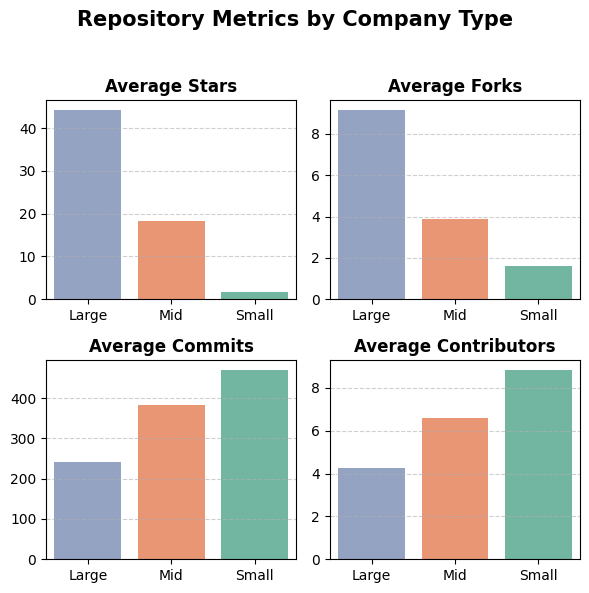

In [160]:
fig, axs = plt.subplots(2, 2, figsize=(6,6))

for i, metric in enumerate(metrics):
    ax = axs[i // 2, i % 2]
    sns.barplot(data=summary_stats_melted[summary_stats_melted['Metric'] == metric],
                x='Company Type', y='Value', palette=palette, ax=ax)
    ax.set_title(metric, fontsize=12, weight='bold')
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.suptitle('Repository Metrics by Company Type', fontsize=15, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('elixir_reporting2/metrics_by_company_type_consistent.png', dpi=300, bbox_inches='tight')
plt.show()

## Collaboration (Geographic Spread)

In [116]:
df_contributors = repos_df[['Organization','Repository', 'Location', 'Contributors', 'Company Type']].copy(deep=True)

In [117]:
df_contributors.to_csv('a.csv')

In [118]:
import ast
import numpy as np
import json
import pycountry

def extract_contributor_countries(contributors_str):
    try:
        contributors_list = ast.literal_eval(contributors_str)  # Convert string to list of dictionaries
        countries = [contributor.get("location", "Unknown") for contributor in contributors_list if contributor.get("location")]
        return countries
    except (ValueError, SyntaxError):
        return ["Unknown"]

def extract_country(location):
    if pd.isna(location) or location.strip() == "" or location == "Unknown" or location == None:
        return "Unknown"

    location_lower = location.lower()

    # Check direct country match
    for country in pycountry.countries:
        if country.name.lower() in location_lower or (hasattr(country, "official_name") and country.official_name.lower() in location_lower):
            return country.name

    country_mapping_file = "location_to_country_mapping.json"

    with open(country_mapping_file, "r") as json_file:
        country_mapping = json.load(json_file)

    for key, value in country_mapping.items():
        if key in location_lower:
            return value

    return "Unknown"

df_contributors["Contributor_Location"] = df_contributors["Contributors"].apply(extract_contributor_countries)

df_exploded_contributors = df_contributors.explode("Contributor_Location")

df_exploded_contributors["Contributor_Country"] = df_exploded_contributors["Contributor_Location"].apply(extract_country)

# df_exploded_contributors.drop(columns=['Contributor_Countries'], inplace=True)

def get_contributions_by_country(contributors_str, contributor_country):
    try:
        contributors_list = ast.literal_eval(contributors_str)  # Convert string to list of dictionaries
        total_contributions = sum(
            contributor.get("contributions", 0)
            for contributor in contributors_list
            if contributor.get("location") and extract_country(contributor.get("location")) == contributor_country
        )
        return total_contributions
    except (ValueError, SyntaxError):
        return 0

df_exploded_contributors["Country_Contributions"] = df_exploded_contributors.apply(
    lambda row: get_contributions_by_country(row["Contributors"], row["Contributor_Country"]), axis=1
)

df_exploded_contributors

,Organization,Repository,Location,Contributors,Company Type,Contributor_Location,Contributor_Country,Country_Contributions
0,appsilon,styleguide,Poland,"[{'user': 'marekrogala', 'contributions': 10, ...",Mid,Warsaw,Poland,4
0,appsilon,styleguide,Poland,"[{'user': 'marekrogala', 'contributions': 10, ...",Mid,"Cambridge, UK",United Kingdom,1
1,appsilon,formage,Poland,"[{'user': 'ishai', 'contributions': 79, 'locat...",Mid,Israel,Israel,15
1,appsilon,formage,Poland,"[{'user': 'ishai', 'contributions': 79, 'locat...",Mid,"Prince Edward, ON",Canada,3
1,appsilon,formage,Poland,"[{'user': 'ishai', 'contributions': 79, 'locat...",Mid,"Morton, IL",United States,2
...,...,...,...,...,...,...,...,...
530,thehyve,heim-transmart-gwas-plugin,Netherlands,"[{'user': 'hberube', 'contributions': 39, 'loc...",Small,"Royal Oak, MI, USA",United States,13
530,thehyve,heim-transmart-gwas-plugin,Netherlands,"[{'user': 'hberube', 'contributions': 39, 'loc...",Small,"Royston, UK",United Kingdom,65
530,thehyve,heim-transmart-gwas-plugin,Netherlands,"[{'user': 'hberube', 'contributions': 39, 'loc...",Small,London,United Kingdom,65
530,thehyve,heim-transmart-gwas-plugin,Netherlands,"[{'user': 'hberube', 'contributions': 39, 'loc...",Small,"Almada, Portugal",Portugal,2


In [119]:
# df_exploded_contributors[df_exploded_contributors.Contributor_Country=='Unknown']['Contributor_Location'].unique()

In [120]:
df_filtered_contributors = df_exploded_contributors[df_exploded_contributors["Contributor_Country"] != "Unknown"]
df_filtered_contributors

,Organization,Repository,Location,Contributors,Company Type,Contributor_Location,Contributor_Country,Country_Contributions
0,appsilon,styleguide,Poland,"[{'user': 'marekrogala', 'contributions': 10, ...",Mid,Warsaw,Poland,4
0,appsilon,styleguide,Poland,"[{'user': 'marekrogala', 'contributions': 10, ...",Mid,"Cambridge, UK",United Kingdom,1
1,appsilon,formage,Poland,"[{'user': 'ishai', 'contributions': 79, 'locat...",Mid,Israel,Israel,15
1,appsilon,formage,Poland,"[{'user': 'ishai', 'contributions': 79, 'locat...",Mid,"Prince Edward, ON",Canada,3
1,appsilon,formage,Poland,"[{'user': 'ishai', 'contributions': 79, 'locat...",Mid,"Morton, IL",United States,2
...,...,...,...,...,...,...,...,...
530,thehyve,heim-transmart-gwas-plugin,Netherlands,"[{'user': 'hberube', 'contributions': 39, 'loc...",Small,"Royal Oak, MI, USA",United States,13
530,thehyve,heim-transmart-gwas-plugin,Netherlands,"[{'user': 'hberube', 'contributions': 39, 'loc...",Small,"Royston, UK",United Kingdom,65
530,thehyve,heim-transmart-gwas-plugin,Netherlands,"[{'user': 'hberube', 'contributions': 39, 'loc...",Small,London,United Kingdom,65
530,thehyve,heim-transmart-gwas-plugin,Netherlands,"[{'user': 'hberube', 'contributions': 39, 'loc...",Small,"Almada, Portugal",Portugal,2


In [121]:
df_filtered_contributors['Contributor_Country'].nunique()

71

In [122]:
df_filtered_contributors.groupby('Company Type')['Contributor_Country'].nunique().reset_index()

,Company Type,Contributor_Country
0,Large,26
1,Mid,59
2,Small,47


In [94]:
# location_counts = df_filtered_contributors.groupby('Company Type')['Contributor_Country'].nunique().reset_index()

# palette = {
#     'Startup': '#66c2a5',
#     'Mid-Level': '#fc8d62',
#     'Enterprise': '#8da0cb'
# }

# plt.figure(figsize=(5, 5))
# sns.barplot(data=location_counts, x='Company Type', y='Contributor_Country', palette=palette)

# plt.title('Collaboration Locations Covered by Company Type', fontsize=10, weight='bold')
# plt.ylabel('Number of Unique Locations')
# plt.xlabel('Company Type')
# plt.grid(axis='y', linestyle='--', alpha=0.6)
# plt.tight_layout()
# plt.savefig('elixir_reporting2/unique_locations_by_company_type.png', dpi=300, bbox_inches='tight')
# plt.show()


In [95]:
# avg_contributor_country_per_repo = df_filtered_contributors.groupby(['Company Type', 'Repository'])['Contributor_Country'].nunique().reset_index()
# avg_summary = avg_contributor_country_per_repo.groupby('Company Type')['Contributor_Country'].mean().reset_index().rename(columns={'Contributor_Country': 'Avg Contributor Countries per Repository'})

# plt.figure(figsize=(5, 5))
# sns.barplot(data=avg_summary, x='Company Type', y='Avg Contributor Countries per Repository', palette=palette)

# plt.title('Average Number of Locations Per Project', fontsize=10, weight='bold')
# # plt.ylabel('Average Number of Locations Per Project')
# plt.xlabel('Company Type')
# plt.grid(axis='y', linestyle='--', alpha=0.6)
# plt.tight_layout()
# plt.savefig('unique_locations_by_company_type.png', dpi=300, bbox_inches='tight')
# plt.show()

In [96]:
# df_contributions_per_repository = df_filtered_contributors.groupby(
#    ["Repository", "Location", "Contributor_Country"], as_index=False
# ).agg(
#     Total_Contributions=("Country_Contributions", "sum")
# )

# df_contributions_per_repository.sort_values(by='Total_Contributions', ascending=False).head(20)

In [123]:
df_contributions_per_location = df_filtered_contributors.groupby(
   ["Location", "Contributor_Country"], as_index=False
).agg(
    Total_Contributions=("Country_Contributions", "sum")
)

df_contributions_per_location.sort_values(by='Total_Contributions', ascending=False).head(20)

,Location,Contributor_Country,Total_Contributions
149,Spain,United States,359539
194,United States,United States,89326
69,Netherlands,Netherlands,37684
127,Spain,Germany,30767
102,Poland,Poland,28558
77,Netherlands,United States,25365
143,Spain,Spain,20001
113,Poland,United States,19874
76,Netherlands,United Kingdom,12062
144,Spain,Sweden,11013


In [124]:
country_coords = {
    "Argentina": (-38.4161, -63.6167),
    "Australia": (-25.2744, 133.7751),
    "Austria": (47.5162, 14.5501),
    "Bangladesh": (23.6850, 90.3563),
    "Belgium": (50.5039, 4.4699),
    "Brazil": (-14.2350, -51.9253),
    "Canada": (56.1304, -106.3468),
    "Chile": (-35.6751, -71.5430),
    "China": (35.8617, 104.1954),
    "Colombia": (4.5709, -74.2973),
    "Croatia": (45.1000, 15.2000),
    "Czech Republic": (49.8175, 15.4730),
    "Czechia": (49.8175, 15.4730),
    "Denmark": (56.2639, 9.5018),
    "Dominica": (15.4150, -61.3710),
    "El Salvador": (13.7942, -88.8965),
    "Estonia": (58.5953, 25.0136),
    "Finland": (61.9241, 25.7482),
    "France": (46.2276, 2.2137),
    "Germany": (51.1657, 10.4515),
    "Greece": (39.0742, 21.8243),
    "Hong Kong": (22.3193, 114.1694),
    "Hungary": (47.1625, 19.5033),
    "Iceland": (64.9631, -19.0208),
    "India": (20.5937, 78.9629),
    "Indonesia": (-0.7893, 113.9213),
    "Ireland": (53.4129, -8.2439),
    "Israel": (31.0461, 34.8516),
    "Italy": (41.8719, 12.5674),
    "Japan": (36.2048, 138.2529),
    "Jersey": (49.2144, -2.1312),
    "Kazakhstan": (48.0196, 66.9237),
    "Lithuania": (55.1694, 23.8813),
    "Luxembourg": (49.8153, 6.1296),
    "Malaysia": (4.2105, 101.9758),
    "Mexico": (23.6345, -102.5528),
    "Montenegro": (42.7087, 19.3744),
    "Netherlands": (52.1326, 5.2913),
    "New Zealand": (-40.9006, 174.8860),
    "Niger": (17.6078, 8.0817),
    "Norway": (60.4720, 8.4689),
    "Oman": (21.4735, 55.9754),
    "Philippines": (13.4100, 122.5600),
    "Poland": (51.9194, 19.1451),
    "Portugal": (39.3999, -8.2245),
    "Russia": (61.5240, 105.3188),
    "Saudi Arabia": (23.8859, 45.0792),
    "Senegal": (14.4974, -14.4524),
    "Serbia": (44.0165, 21.0059),
    "Singapore": (1.3521, 103.8198),
    "Slovenia": (46.1512, 14.9955),
    "South Africa": (-30.5595, 22.9375),
    "South Korea": (35.9078, 127.7669),
    "Spain": (40.4637, -3.7492),
    "Sweden": (60.1282, 18.6435),
    "Switzerland": (46.8182, 8.2275),
    "Taiwan": (23.6978, 120.9605),
    "Thailand": (15.8700, 100.9925),
    "Tunisia": (33.8869, 9.5375),
    "Turkey": (38.9637, 35.2433),
    "Ukraine": (48.3794, 31.1656),
    "United Arab Emirates": (23.4241, 53.8478),
    "United Kingdom": (55.3781, -3.4360),
    "United States": (37.0902, -95.7129),
    "Vietnam": (14.0583, 108.2772)
}


In [125]:
len(country_coords.keys())

65

In [126]:
df = df_contributions_per_location

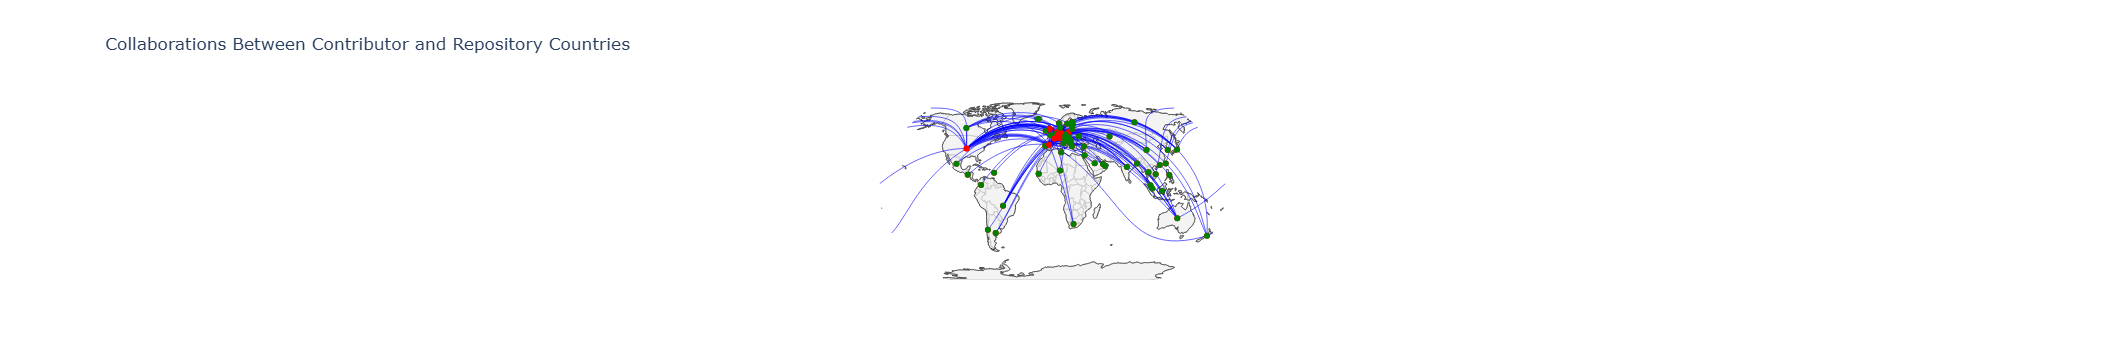

In [127]:

# Map coordinates back to dataframe
df['Loc_Lat'] = df['Location'].map(lambda x: country_coords.get(x, (None, None))[0])
df['Loc_Lon'] = df['Location'].map(lambda x: country_coords.get(x, (None, None))[1])
df['Contrib_Lat'] = df['Contributor_Country'].map(lambda x: country_coords.get(x, (None, None))[0])
df['Contrib_Lon'] = df['Contributor_Country'].map(lambda x: country_coords.get(x, (None, None))[1])

import plotly.graph_objects as go

fig = go.Figure()

# Draw lines for top 50
for i, row in df.iterrows():
    if None not in (row['Loc_Lat'], row['Loc_Lon'], row['Contrib_Lat'], row['Contrib_Lon']):
        fig.add_trace(go.Scattergeo(
            locationmode='country names',
            lon=[row['Contrib_Lon'], row['Loc_Lon']],
            lat=[row['Contrib_Lat'], row['Loc_Lat']],
            mode='lines',
            line=dict(width=max(row['Total_Contributions'] / 100000, 1), color='blue'),
            opacity=0.6,
        ))

unique_countries = set(df['Location']).union(set(df['Contributor_Country']))

for country in unique_countries:
    coords = country_coords.get(country)
    if coords:
        fig.add_trace(go.Scattergeo(
            locationmode='country names',
            lon=[coords[1]],
            lat=[coords[0]],
            mode='markers',
            marker=dict(size=6, color='red'),
            text=country,
            hoverinfo='text'
        ))

for country in unique_countries:
    coords = country_coords.get(country)
    if coords:
        if country in df['Location'].values:
            color = 'red'  # Repo location
        elif country in df['Contributor_Country'].values:
            color = 'green'  # Contributor
        else:
            color = 'gray'  # Fallback (shouldn't be needed)

        fig.add_trace(go.Scattergeo(
            locationmode='country names',
            lon=[coords[1]],
            lat=[coords[0]],
            mode='markers',
            marker=dict(size=6, color=color),
            text=country,
            hoverinfo='text'
        ))

fig.update_layout(
    title_text='Collaborations Between Contributor and Repository Countries',
    showlegend=False,
    geo=dict(
        projection_type='natural earth',
        showland=True,
        landcolor='rgb(243, 243, 243)',
        countrycolor='rgb(204, 204, 204)',
        showcountries=True,
        showframe=False,
        showcoastlines=True,
        uirevision='static'
    )
)

fig.write_html('collaboration_map.html')
fig.show()

In [129]:
df.to_csv('Page 15 Collaborations Between Contributor and Repository Countries.csv')

In [ ]:
repos_df

Release Count:
→ See which companies formalize their tools via versioning.

Sharing Behavior Patterns
Understand how these companies share: Anaylze Fork Behavior
Percentage of repositories forked (via Is_Fork and Parent_Repo columns).
Which company types fork more vs. build from scratch?
Collaboration & Forking Network
Using the Forks_History and Contributors columns
Visualize collaborative patterns → How often companies contribute to/fork others' repositories.
Network graph visualization idea → Nodes = companies, edges = fork or contributor relationships.

Open Source Readiness: Has_README and Has_Wiki → Indicates how well-documented repositories are.
Potentially more formalized in larger organizations.